# **F1 - Score**


El **F1-score** es una métrica de evaluación utilizada en problemas de clasificación para medir el equilibrio entre la **precisión** y la **recuperación** (recall). Es especialmente útil cuando hay clases desbalanceadas, es decir, cuando una clase tiene muchos más ejemplos que la otra.

### Fórmulas clave:

1. **Precisión (Precision)**: ¿Cuántos de los que predije como positivos realmente lo son?  
   $
   Precision = \frac{TP}{TP + FP}
   $
   - TP (True Positives): Verdaderos positivos  
   - FP (False Positives): Falsos positivos  

2. **Recall (Sensibilidad o Recuperación)**: ¿Cuántos de los positivos reales fueron detectados?  
   $
   Recall = \frac{TP}{TP + FN}
   $
   - FN (False Negatives): Falsos negativos  

3. **F1-score**: Es la **media armónica** entre precisión y recall:  
   $
   F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
   $
   Se usa la media armónica porque penaliza más las diferencias grandes entre precisión y recall. Un F1-score alto solo se logra si ambos valores son altos.

### Interpretación:
- **F1 = 1**: Clasificación perfecta (precisión y recall son ambos 1).
- **F1 = 0**: Clasificación completamente errónea.
- **Valores intermedios**: Cuanto más alto el F1-score, mejor el rendimiento del modelo.

----

Ahora veamos un ejemplo en el que entenderemos el valor agregado del F1 Score. Utilizaremos un conjunto de datos de ejemplo que contiene información sobre varios visitantes de un sitio web.

El objetivo del ejercicio será construir un modelo de clasificación sencillo que utilice cuatro variables independientes para predecir si el visitante comprará algo. Veremos cómo utilizar diferentes métricas y cómo diferentes métricas nos darán diferentes conclusiones.


In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/JoosKorstanje/datasets/main/sales_data.csv')
data.head()

,time_on_page,pages_viewed,interest_ski,interest_climb,buy
0,282.0,3.0,0,1,1
1,223.0,3.0,0,1,1
2,285.0,3.0,1,1,1
3,250.0,3.0,0,1,1
4,271.0,2.0,1,1,1


<Axes: title={'center': 'Class distribution'}, xlabel='buy'>

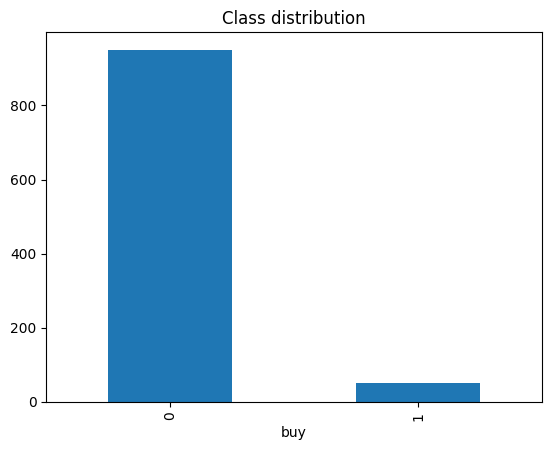

In [2]:
data.pivot_table(index='buy', aggfunc='size').plot(kind='bar', title = 'Class distribution')


# División de Entrenamiento y Prueba Estratificada

Antes de construir cualquier modelo, debemos crear una división de entrenamiento/prueba.

Sin embargo, es arriesgado realizar una división de entrenamiento/prueba aleatoria estándar cuando se tiene un fuerte desequilibrio de clases. Debido al número muy pequeño de casos positivos, podrías terminar con un conjunto de entrenamiento y prueba que tienen distribuciones de clases muy diferentes. Incluso podrías terminar con casi cero casos positivos en tu conjunto de pruebas.

El muestreo estratificado es un método de muestreo que evita perturbar el equilibrio de clases en tus muestras. Te permite generar un conjunto de entrenamiento y un conjunto de pruebas con el mismo equilibrio de clases que en los datos originales. Puedes utilizar el siguiente código para ejecutar un muestreo estratificado de entrenamiento/prueba en scikit-learn:

# A Baseline Model

In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3, stratify=data.buy)

In [4]:
# this very bad model predicts that nobody ever buys anything
preds = [0] * len(test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(test.buy, preds)

0.95

In [6]:

from sklearn.metrics import precision_score, recall_score
print('Precision is: ', precision_score(test.buy, preds))
print('Recall is: ', recall_score(test.buy, preds))

Precision is:  0.0
Recall is:  0.0


/home/analitica/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
from sklearn.metrics import precision_score, recall_score

print('Precision is: ', precision_score(test.buy, preds, zero_division=0))
print('Recall is: ', recall_score(test.buy, preds, zero_division=0))

Precision is:  0.0
Recall is:  0.0


In [8]:
from sklearn.metrics import f1_score
print('F1 is: ', f1_score(test.buy, preds))

F1 is:  0.0


# A Better Model

In [9]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression with only default settings
my_log_reg = LogisticRegression()

# Fit the logistic regression on the independent variables of the train data with buy as dependent variable
my_log_reg.fit(train[['time_on_page',	'pages_viewed',	'interest_ski',	'interest_climb']], train['buy'])

# Make a prediction using our model on the test set
preds = my_log_reg.predict(test[['time_on_page',	'pages_viewed',	'interest_ski',	'interest_climb']])


In [10]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test['buy'], preds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  282 
False positives:  3 
False negatives:  7 
True Positives:  8


In [11]:
print('Accuracy is: ', accuracy_score(test.buy, preds))

Accuracy is:  0.9666666666666667


In [12]:

print('Precision is: ', precision_score(test.buy, preds))
print('Recall is: ', recall_score(test.buy, preds))

Precision is:  0.7272727272727273
Recall is:  0.5333333333333333


In [14]:

print('F1 is: ', f1_score(test.buy, preds))

F1 is:  0.6153846153846154


# ¿Qué modelo y métrica son mejores?

Por lo tanto, la precisión y la exhaustividad nos indican que la regresión logística es mejor que el mal modelo base. Intentemos comprender por qué:

1. El número total de errores de los dos modelos es el mismo. Por lo tanto, la precisión es la misma.
2. El segundo modelo es capaz de encontrar (al menos algunos) casos positivos (compradores), mientras que el primer modelo no encontró ni un solo comprador en los datos. Por lo tanto, la exhaustividad (recall) del segundo modelo es mayor (0.33 para la regresión logística en lugar de 0 para el primer modelo).
3. El primer modelo no encontró ningún comprador y la precisión es automáticamente cero. La regresión logística encontró algunos compradores, por lo que podemos calcular una precisión. La precisión muestra cuántos de los compradores predichos fueron realmente correctos. Esto resulta ser del 50%.
4. El puntaje F1 es la métrica que realmente nos interesa. El objetivo del ejemplo era mostrar su valor agregado para el modelado con datos desequilibrados. El puntaje F1 resultante del primer modelo fue 0: podemos estar satisfechos con este puntaje, ya que fue un modelo muy malo.
5. El puntaje F1 del segundo modelo fue de 0.4. Esto muestra que el segundo modelo, aunque está lejos de ser perfecto, al menos es una mejora seria con respecto al primer modelo. Esta es información valiosa que no podríamos haber obtenido utilizando la precisión como métrica porque la precisión de ambos modelos es la misma.


# Conclusión

El F1 - score se vuelve especialmente valioso al trabajar en modelos de clasificación en los que su conjunto de datos está desequilibrado.

El F1-score combina la precisión y la exhaustividad en una sola métrica. Esto facilita su uso en Grid Search u optimización automatizada.
